In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# we'll use this later for our model
!pip install Unicode
! pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# for data exploration
import pandas as pd
import numpy as np
import datetime as dt 
import io
import gc

# remove warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# for text processing 
import re
import nltk 

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import string 
string.punctuation

from unidecode import unidecode


# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

# to display all columns ana rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.min_rows',None)
pd.set_option('display.expand_frame_repr',True)

print('Libraries Imported!')

Libraries Imported!


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# /kaggle/input/nlp-getting-started/train.csv
train_df  = pd.read_csv('train.csv')
# /kaggle/input/nlp-getting-started/test.csv
test_df = pd.read_csv('test.csv')

# we'll use this for all of our models

In [ ]:
gc.collect()

46

In [ ]:
# let's get the first few lines of the dataset
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# informations about the structure and content of the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
# #Get the number of null values for each column of train dataset
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

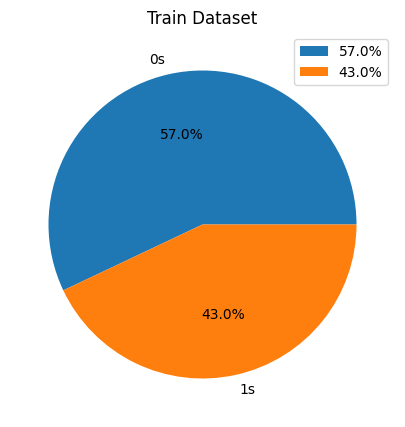

In [ ]:
#Pie Chart Showing Proportion of 1s and 0s in the Train Dataset 

import matplotlib.pyplot as plt 
train_size = len(train_df)
train_counts= train_df['target'].value_counts() 

fig,ax  = plt.subplots(figsize=(10, 5))
train_labels = ['0s', '1s']
train_sizes = [train_counts[0], train_counts[1]]
train_percents = [f'{count/train_size*100:.1f}%' for count in train_sizes]
ax.pie(train_sizes, labels=train_labels, autopct='%1.1f%%')
ax.set_title('Train Dataset')
ax.legend(loc='upper right', labels=train_percents)


0    4342
1    3271
Name: target, dtype: int64


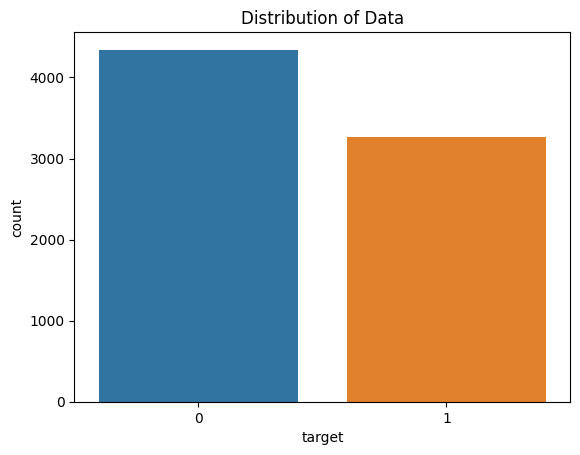

In [ ]:
# Visualization of the frequency distribution of the 'target' variable
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Data');

print(train_df['target'].value_counts())

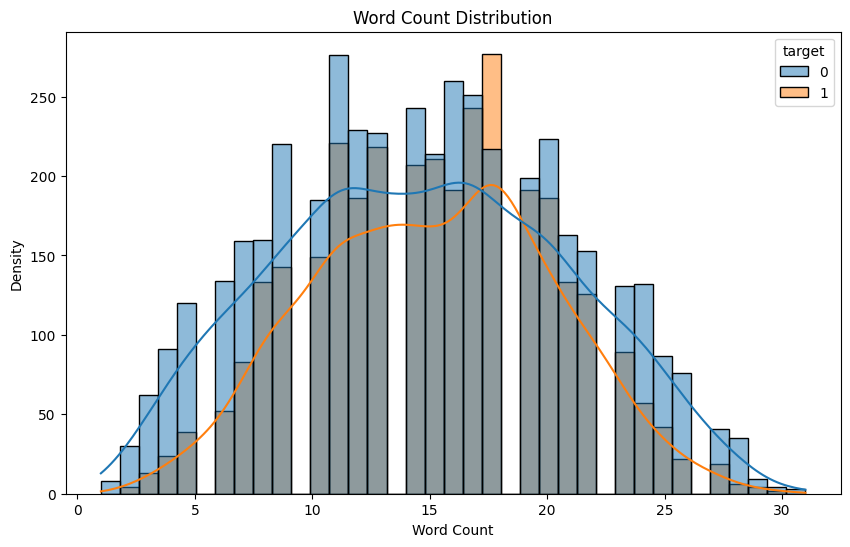

In [ ]:
# Visualization of the distribution of word count
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='word_count', hue='target', kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.show()

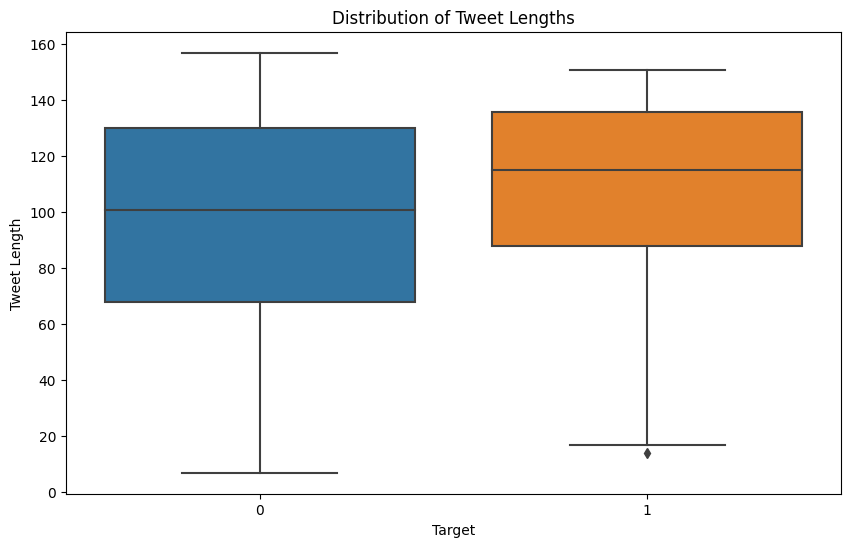

In [ ]:
# Visualization of the distribution of tweet length
train_df['tweet_length'] = train_df['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='target', y='tweet_length')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Target')
plt.ylabel('Tweet Length')
plt.show()

In [ ]:
# we can drop location column as it contains info of location from where tweets were done
train_df = train_df.drop(columns = ['location'],axis=1)
train_df.head()
# print updated (first few lines) of dataset

,id,keyword,text,target,word_count,tweet_length
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,7,38
2,5,NaN,All residents asked to 'shelter in place' are ...,1,22,133
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88


In [ ]:
# finding count of each category (0 and 1 classification)
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# let's clean up the data with a function to process the input
def process_input(var):
    """
    Function for text preprocessing with Poter Stemming.
    """
    sw = set(stopwords.words('english'))
    ps = PorterStemmer() 

    # tokenize the word using nltk  
    my_text = nltk.word_tokenize(var)

    # remove not english characters, lower case and remove the white space at end 
    my_text = re.sub('[^A-Za-z0-9]+', " ", var).lower().strip()

    # remove stop words 
    my_text = [word for word in my_text.split() if word not in sw]

    # stemming
    my_text = [ps.stem(word) for word in my_text]

    # convert back to sentence
    my_text = ' '.join(my_text)

    return my_text

In [ ]:
# renassigning that column after processing the text
train_df['text'] = train_df['text'].apply(process_input)

In [ ]:
# let's get the first few lines of code 
train_df.head()

,id,keyword,text,target,word_count,tweet_length
0,1,NaN,deed reason earthquak may allah forgiv us,1,13,69
1,4,NaN,forest fire near la rong sask canada,1,7,38
2,5,NaN,resid ask shelter place notifi offic evacu she...,1,22,133
3,6,NaN,13 000 peopl receiv wildfir evacu order califo...,1,8,65
4,7,NaN,got sent photo rubi alaska smoke wildfir pour ...,1,16,88


In [ ]:
# split data into train and test
# test_size=0.33, random_state=42
# X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.33, random_state=42)

# added .values
y = train_df['target'].values
X = train_df.drop('target', axis=1)


X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.33, random_state=42)

vectorizer = CountVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)

vectors_train = vectorizer.fit_transform(X_train['text'])

vectors_train.shape

(5100, 83449)

In [ ]:
print(X_train.shape, X_validate.shape)
print(y_train.shape, y_validate.shape)

(5100, 5) (2513, 5)
(5100,) (2513,)


# Implementing Naive Bayes and Logistic Regression

In [ ]:
# Using LogisticRegression
clf = LogisticRegression()
clf2 = MultinomialNB(alpha=0.42)

In [ ]:
# Fit logistic regression
#clf.fit(X_train,y_train)
# Fit Naive Bayes
clf2.fit(vectors_train, y_train)
print(len(y_train))

5100


In [ ]:
# prediction on test data
#pred = clf2.predict(X_test)
# Get the test vectors
vectors_valid = vectorizer.transform(X_validate['text'])

# Predict and score the vectors
pred = clf2.predict(vectors_valid)
print(len(pred))

2513


In [ ]:
# finding score on test data
#clf2.score(X_validate,y_validate)

In [ ]:
print(classification_report(y_validate, pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1446
           1       0.77      0.73      0.75      1067

    accuracy                           0.79      2513
   macro avg       0.79      0.79      0.79      2513
weighted avg       0.79      0.79      0.79      2513



In [ ]:
# Finding accuracy score between actual and predicted values

acc_score = metrics.accuracy_score(y_validate, pred)
f1_score = metrics.f1_score(y_validate, pred, average='macro')
recall = metrics.recall_score(y_validate, pred)

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))
print(f"Recall: {recall}")

Total accuracy classification score: 0.7938718662952646
Total F1 classification score: 0.7871990589072285
Recall: 0.7263355201499532


In [ ]:
df3 = pd.DataFrame()
df3['id'] = test_df['id']
vectors_test = vectorizer.transform(test_df['text'])
print(vectors_test)
df3['target'] = clf2.predict(vectors_test)
print('Running model on test data')
print(len(df3['target']))

  (0, 13489)	1
  (0, 13511)	1
  (0, 17805)	1
  (1, 33091)	1
  (1, 64500)	1
  (1, 70083)	1
  (1, 70101)	1
  (2, 28443)	1
  (2, 58410)	1
  (2, 64977)	1
  (2, 69474)	1
  (2, 70692)	1
  (4, 1555)	1
  (4, 15050)	1
  (4, 68945)	1
  (4, 72155)	1
  (4, 76619)	1
  (4, 76634)	1
  (6, 23679)	2
  (6, 45409)	1
  (6, 82836)	1
  (7, 33568)	1
  (8, 32710)	1
  (8, 53080)	1
  (9, 29156)	1
  :	:
  (3257, 23353)	1
  (3257, 74612)	1
  (3257, 83072)	1
  (3259, 5273)	1
  (3259, 34085)	1
  (3259, 45640)	1
  (3259, 58752)	1
  (3259, 70473)	1
  (3260, 14909)	1
  (3260, 14916)	1
  (3260, 31418)	1
  (3260, 31423)	1
  (3260, 35048)	1
  (3260, 46075)	1
  (3261, 35048)	1
  (3261, 39462)	1
  (3261, 39463)	1
  (3261, 55454)	1
  (3261, 55457)	1
  (3261, 55458)	1
  (3261, 80059)	1
  (3261, 80090)	1
  (3261, 80092)	1
  (3262, 57675)	1
  (3262, 83159)	1
Running model on test data
3263


In [ ]:
#df3.to_csv('submissionTest3.csv',index=False)

In [ ]:
#type(X_validate)
#y_pred_proba = clf2.predict_proba(X_validate)
#print('Predicted probability',y_pred_proba)

Confusion matrix Naive Bayes [[1220  226]
 [ 292  775]]


Text(50.722222222222214, 0.5, 'True')

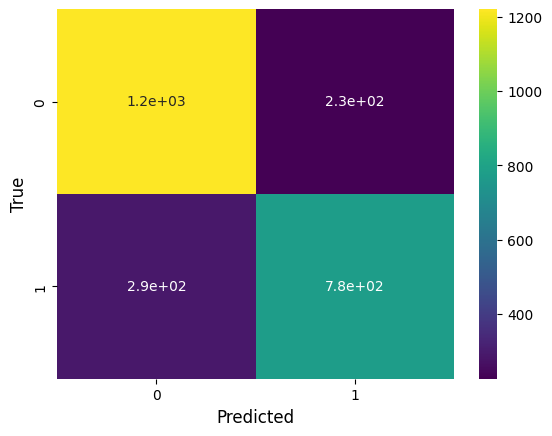

In [ ]:
confmat_NB = metrics.confusion_matrix(y_validate, pred)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix Naive Bayes", confmat_NB)
sns.heatmap(confmat_NB, annot=True, cmap='viridis')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

# TF-IDF Vectorizer
Taking only word count in documents may have certain drawbacks. The presence of frequent word vectors wont be sparse (espicially stopwords), though the word may not be important. Also, rare words look very sparse, hence they are less important. To tackle these problems, we use TF-IDF vectorization.

In [ ]:
X_train, X_validate , y_train, y_validate = train_test_split(train_df['text'].values, train_df['target'].values, test_size=0.4285, random_state=42, stratify=train_df['target'].values)
# 3263

In [ ]:
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_vectors = tfidf_vectorizer.transform(X_validate)

In [ ]:
# using logistic regression as the classifier 
clf4 = LogisticRegression()

clf4.fit(tfidf_train_vectors, y_train)

LogisticRegression()

In [ ]:
y_predV = clf4.predict(tfidf_test_vectors)
print(len(y_predV))

3263


In [ ]:
print(classification_report(y_validate, y_predV))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83      1861
           1       0.81      0.70      0.75      1402

    accuracy                           0.80      3263
   macro avg       0.80      0.79      0.79      3263
weighted avg       0.80      0.80      0.80      3263



Confusion matrix Vectorizer [[1629  232]
 [ 417  985]]


Text(50.722222222222214, 0.5, 'True')

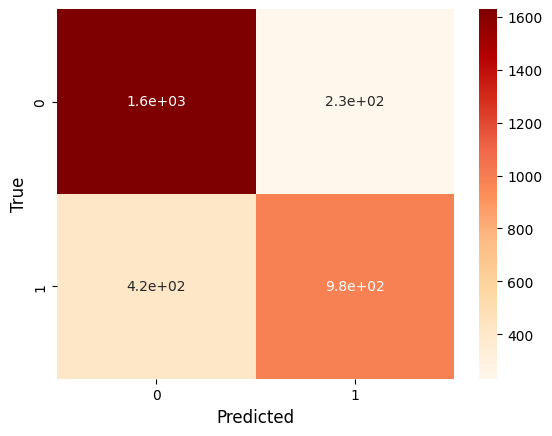

In [ ]:
confmat_vectorizer = metrics.confusion_matrix(y_validate, y_predV)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix Vectorizer", confmat_vectorizer)
sns.heatmap(confmat_vectorizer, annot=True, cmap='OrRd')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

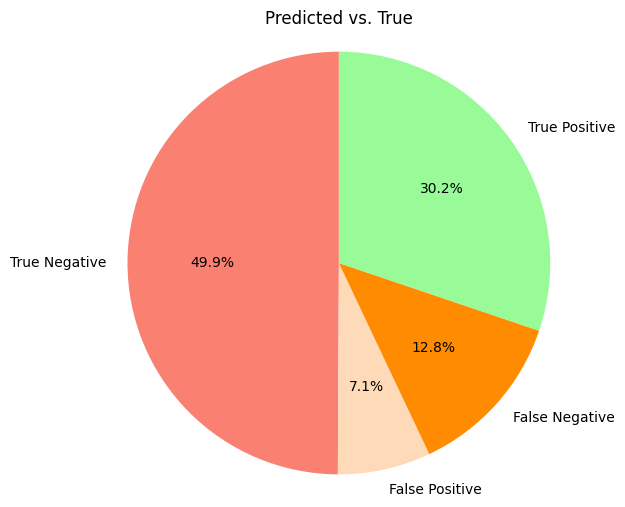

In [ ]:
import matplotlib.pyplot as plt

# Calculating the counts for each category in the confusion matrix
TN, FP, FN, TP = confmat_vectorizer.ravel()
counts = [TN, FP, FN, TP]

# Define the labels for the pie chart
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Define colors for the pie slices
colors = ['salmon', 'peachpuff', 'darkorange', 'palegreen']

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Predicted vs. True')

# Displaying the pie chart
plt.show()


# Applying Decision Tree 

In [ ]:
from sklearn import tree
# creating a decision tree object 
dt = tree.DecisionTreeClassifier()

In [ ]:
dt = DecisionTreeClassifier(max_depth = 60)
# para={'max_depth':range(1,100)}
# gv=GridSearchCV(dt,param_grid=para,cv=5)
modelDTree = dt.fit(tfidf_train_vectors, y_train)

In [ ]:
# let's print the decision tree score using the corresponding function
modelDTree.score(tfidf_train_vectors, y_train)

0.9006896551724138

In [ ]:
y_predDT = modelDTree.predict(tfidf_test_vectors)
print(len(y_predDT))
# make sure it fits the size of the submission 

3263


In [ ]:
print(classification_report(y_predDT, y_validate))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      2207
           1       0.57      0.76      0.66      1056

    accuracy                           0.74      3263
   macro avg       0.72      0.75      0.72      3263
weighted avg       0.77      0.74      0.75      3263



In [ ]:
df_tester = pd.DataFrame()
df_tester['id'] = test_df['id']
vectors_test = vectorizer.transform(test_df['text'])
print(vectors_test)

df_tester['target'] = y_predDT
print('Running model on test data')
print(len(df_tester['target']))

  (0, 13489)	1
  (0, 13511)	1
  (0, 17805)	1
  (1, 33091)	1
  (1, 64500)	1
  (1, 70083)	1
  (1, 70101)	1
  (2, 28443)	1
  (2, 58410)	1
  (2, 64977)	1
  (2, 69474)	1
  (2, 70692)	1
  (4, 1555)	1
  (4, 15050)	1
  (4, 68945)	1
  (4, 72155)	1
  (4, 76619)	1
  (4, 76634)	1
  (6, 23679)	2
  (6, 45409)	1
  (6, 82836)	1
  (7, 33568)	1
  (8, 32710)	1
  (8, 53080)	1
  (9, 29156)	1
  :	:
  (3257, 23353)	1
  (3257, 74612)	1
  (3257, 83072)	1
  (3259, 5273)	1
  (3259, 34085)	1
  (3259, 45640)	1
  (3259, 58752)	1
  (3259, 70473)	1
  (3260, 14909)	1
  (3260, 14916)	1
  (3260, 31418)	1
  (3260, 31423)	1
  (3260, 35048)	1
  (3260, 46075)	1
  (3261, 35048)	1
  (3261, 39462)	1
  (3261, 39463)	1
  (3261, 55454)	1
  (3261, 55457)	1
  (3261, 55458)	1
  (3261, 80059)	1
  (3261, 80090)	1
  (3261, 80092)	1
  (3262, 57675)	1
  (3262, 83159)	1
Running model on test data
3263


In [ ]:
print(y_validate.shape, y_predDT.shape)

(3263,) (3263,)


Confusion matrix Decision Tree [[1611  250]
 [ 596  806]]


Text(50.722222222222214, 0.5, 'True')

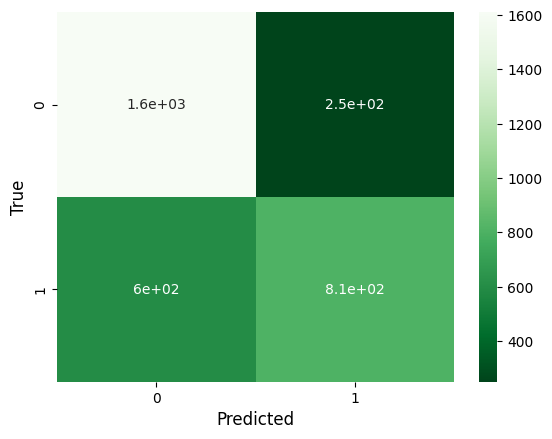

In [ ]:
confmat_Dtree = metrics.confusion_matrix(y_validate, y_predDT)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix Decision Tree", confmat_Dtree)
sns.heatmap(confmat_Dtree, annot=True, cmap='Greens_r')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
#df.to_csv('submissionDtree2.csv',index=False)

# Transformers Model

Supervised machine learning algorithm typically used for classification tasks. We want to try to implement an svc model because they work well with unstructured and semi-structured data like text and images whereas logistic regression works with already classified or separated independent variables. SVC models use a subset of the training data in the decision function, called support vectors.

We'll need to install the sentence transformers using pip

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Reference for using transformers: https://huggingface.co/sentence-transformers/all-MiniLM-L12-v2

Reference for using support vector classifier: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Reference for using support vector classifier: https://www.datatechnotes.com/2020/07/classification-example-with-linearsvm-in-python.html

Given text as input, it ouptuts a vector which notes the semantic information

In [ ]:
from sentence_transformers import SentenceTransformer
modelTransformer = SentenceTransformer('all-MiniLM-L12-v2')
print(modelTransformer)
# using bert model 

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)


We can print the model to see its attributes and structure

In [ ]:
# double check train_df and test_df
train_df.head()

,id,keyword,text,target,word_count,tweet_length
0,1,NaN,deed reason earthquak may allah forgiv us,1,13,69
1,4,NaN,forest fire near la rong sask canada,1,7,38
2,5,NaN,resid ask shelter place notifi offic evacu she...,1,22,133
3,6,NaN,13 000 peopl receiv wildfir evacu order califo...,1,8,65
4,7,NaN,got sent photo rubi alaska smoke wildfir pour ...,1,16,88


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
X_train_val = train_df.text.apply(unidecode).to_numpy()
X_test = test_df.text.apply(unidecode).to_numpy()

y_train_val = train_df.target.to_numpy()

In [ ]:
X_trainT, X_valT, y_trainT, y_valT = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [ ]:
# let's encode the training, validation and test data and assign them to corresponding variables
X_trainT = modelTransformer.encode(X_trainT)
X_valT = modelTransformer.encode(X_valT)
X_test = modelTransformer.encode(X_test)

print(X_trainT.shape, X_valT.shape, X_test.shape)
print(y_trainT.shape, y_valT.shape)

(6851, 384) (762, 384) (3263, 384)
(6851,) (762,)


In [ ]:
print(X_train.shape, X_validate.shape, X_test.shape)
print(y_train.shape, y_validate.shape)
# make sure the validation shape fits the length of the submission data length

(4350,) (3263,) (3263, 384)
(4350,) (3263,)


In [ ]:
# add regularization parameter 
modelTransformer = SVC(C=0.3)
modelTransformer.fit(X_trainT, y_trainT)

SVC(C=0.3)

In [ ]:
validation_answer = modelTransformer.predict(X_valT)
# printing the transformer accuracy to compare with the other models 
transformer_accuracy = (100 * accuracy_score(y_valT, validation_answer))

print(f"Total accuracy classification score with transformer SVC is: {transformer_accuracy:.2f}%")
# good to go!

Total accuracy classification score with transformer SVC is: 80.84%


In [ ]:
# testing portion
test_answerT = modelTransformer.predict(X_test)
submission_df = pd.DataFrame({"id": test_df.id, "target": test_answerT})

In [ ]:
# Finding accuracy score between actual and predicted values

# validation_answer or test_answer
#acc_scoreT = metrics.accuracy_score(y_validate, test_answer)
#f1_scoreT = metrics.f1_score(y_validate, test_answer, average='macro')
#recallT = metrics.recall_score(y_validate, test_answer)

#print('Total accuracy classification score: {}'.format(acc_scoreT))
#print('Total F1 classification score: {}'.format(f1_scoreT))
#print(f"Recall: {recallT}")

In [ ]:
# from predict function
print(test_answerT.shape)
print(y_validate.shape)
print(X_test.shape)
# modelTransformer.predict(X_valT)
print(validation_answer.shape)
# from train test split function
print(y_valT.shape)

(3263,)
(3263,)
(3263, 384)
(762,)
(762,)


Confusion matrix Transformer [[390  36]
 [110 226]]


Text(50.722222222222214, 0.5, 'True')

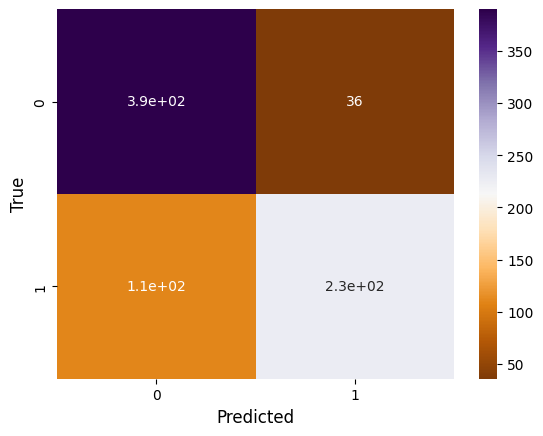

In [ ]:
# confusion matrix
#confmat_Dtree = metrics.confusion_matrix(y_validate, y_predDT)
# X_test
confmat_svc = metrics.confusion_matrix(y_valT, validation_answer)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix Transformer", confmat_svc)
sns.heatmap(confmat_svc, annot=True, cmap='PuOr')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

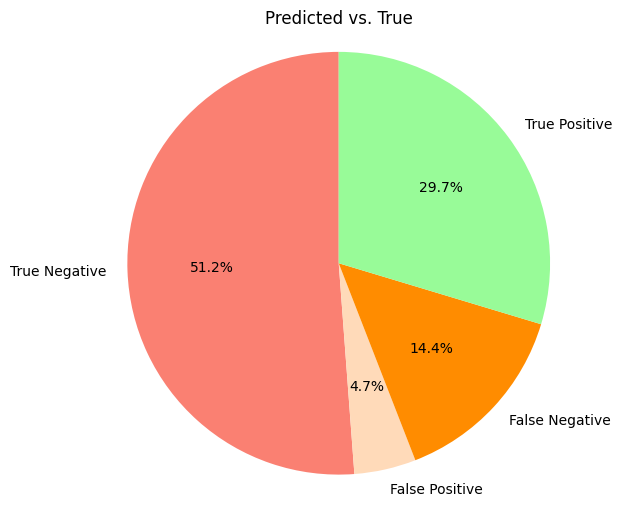

In [ ]:
import matplotlib.pyplot as plt

# Calculating the counts for each category in the confusion matrix
TN, FP, FN, TP = confmat_svc.ravel()
counts = [TN, FP, FN, TP]

# Define the labels for the pie chart
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Define colors for the pie slices
colors = ['salmon', 'peachpuff', 'darkorange', 'palegreen']

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Predicted vs. True')

# Displaying the pie chart
plt.show()


In [ ]:
submission_df.to_csv("submission.csv", index=False)

# Running the Model on Test Dataset (using any model)


In [ ]:
# checking score on test data
# let's try to use our Naive Bayes classifier to test the data 
df = pd.DataFrame()
df['id'] = test_df['id']
vectors_test = vectorizer.transform(test_df['text'])
print(vectors_test)
df['target'] = clf2.predict(vectors_test)
print('Running model on test data')
print(len(df['target']))

  (0, 13489)	1
  (0, 13511)	1
  (0, 17805)	1
  (1, 33091)	1
  (1, 64500)	1
  (1, 70083)	1
  (1, 70101)	1
  (2, 28443)	1
  (2, 58410)	1
  (2, 64977)	1
  (2, 69474)	1
  (2, 70692)	1
  (4, 1555)	1
  (4, 15050)	1
  (4, 68945)	1
  (4, 72155)	1
  (4, 76619)	1
  (4, 76634)	1
  (6, 23679)	2
  (6, 45409)	1
  (6, 82836)	1
  (7, 33568)	1
  (8, 32710)	1
  (8, 53080)	1
  (9, 29156)	1
  :	:
  (3257, 23353)	1
  (3257, 74612)	1
  (3257, 83072)	1
  (3259, 5273)	1
  (3259, 34085)	1
  (3259, 45640)	1
  (3259, 58752)	1
  (3259, 70473)	1
  (3260, 14909)	1
  (3260, 14916)	1
  (3260, 31418)	1
  (3260, 31423)	1
  (3260, 35048)	1
  (3260, 46075)	1
  (3261, 35048)	1
  (3261, 39462)	1
  (3261, 39463)	1
  (3261, 55454)	1
  (3261, 55457)	1
  (3261, 55458)	1
  (3261, 80059)	1
  (3261, 80090)	1
  (3261, 80092)	1
  (3262, 57675)	1
  (3262, 83159)	1
Running model on test data
3263


In [ ]:
df.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1


In [ ]:
import gc
gc.collect()

2919

# Submiting Results

In [ ]:
#df.to_csv("/content/drive/MyDrive/submission_final.csv",index=False)